# Review data

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

def peek_review_file(filepath, num_lines=5):
    """Safely peek at file structure without loading everything"""
    print("Peeking at file structure...")
    
    with open(filepath, 'r', encoding='utf-8') as f:
        for i in range(num_lines):
            try:
                line = f.readline()
                if not line:
                    break
                    
                if i == 0:
                    # Show first line structure
                    first_record = json.loads(line)
                    print(f"First record keys: {list(first_record.keys())}")
                    print(f"Sample record: {first_record}")
                    print("-" * 60)
                
                print(f"Line {i+1} preview: {line[:200]}...")
                
            except json.JSONDecodeError as e:
                print(f"JSON error on line {i+1}: {e}")
            except Exception as e:
                print(f"Error on line {i+1}: {e}")

# Safe peek first
peek_review_file('review-California_10.json')

Peeking at file structure...
First record keys: ['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id']
Sample record: {'user_id': '108991152262655788985', 'name': 'Song Ro', 'time': 1609909927056, 'rating': 5, 'text': 'Love there korean rice cake.', 'pics': None, 'resp': None, 'gmap_id': '0x80c2c778e3b73d33:0xbdc58662a4a97d49'}
------------------------------------------------------------
Line 1 preview: {"user_id": "108991152262655788985", "name": "Song Ro", "time": 1609909927056, "rating": 5, "text": "Love there korean rice cake.", "pics": null, "resp": null, "gmap_id": "0x80c2c778e3b73d33:0xbdc5866...
Line 2 preview: {"user_id": "111290322219796215751", "name": "Rafa Robles", "time": 1612849648663, "rating": 5, "text": "Good very good", "pics": null, "resp": null, "gmap_id": "0x80c2c778e3b73d33:0xbdc58662a4a97d49"...
Line 3 preview: {"user_id": "112640357449611959087", "name": "David Han", "time": 1583643882296, "rating": 4, "text": "They make Korean traditional foo

In [2]:
def count_file_lines(filepath):
    """Efficiently count total lines in file"""
    print("Counting total reviews...")
    
    line_count = 0
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            line_count += 1
            if line_count % 1000000 == 0:  # Progress indicator
                print(f"Processed {line_count:,} lines...")
    
    return line_count

total_reviews = count_file_lines('review-California_10.json')
print(f"\nTotal reviews in file: {total_reviews:,}")

Counting total reviews...
Processed 1,000,000 lines...
Processed 2,000,000 lines...
Processed 3,000,000 lines...
Processed 4,000,000 lines...
Processed 5,000,000 lines...
Processed 6,000,000 lines...
Processed 7,000,000 lines...
Processed 8,000,000 lines...
Processed 9,000,000 lines...
Processed 10,000,000 lines...
Processed 11,000,000 lines...
Processed 12,000,000 lines...
Processed 13,000,000 lines...
Processed 14,000,000 lines...
Processed 15,000,000 lines...
Processed 16,000,000 lines...
Processed 17,000,000 lines...
Processed 18,000,000 lines...
Processed 19,000,000 lines...
Processed 20,000,000 lines...
Processed 21,000,000 lines...
Processed 22,000,000 lines...
Processed 23,000,000 lines...
Processed 24,000,000 lines...
Processed 25,000,000 lines...
Processed 26,000,000 lines...
Processed 27,000,000 lines...
Processed 28,000,000 lines...
Processed 29,000,000 lines...
Processed 30,000,000 lines...
Processed 31,000,000 lines...
Processed 32,000,000 lines...
Processed 33,000,000 li

In [3]:
def sample_review_data(filepath, sample_size=10000, random_seed=42):
    """Load a random sample of reviews for analysis"""
    print(f"Loading random sample of {sample_size:,} reviews...")
    
    # First pass: count total lines (we did this above)
    # For large files, we'll use reservoir sampling or skip-based sampling
    
    import random
    random.seed(random_seed)
    
    # Calculate skip probability for roughly uniform sampling
    skip_prob = max(0.99, 1 - (sample_size / total_reviews))
    
    sampled_reviews = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line_num, line in enumerate(f):
            # Skip most lines randomly for sampling
            if random.random() < skip_prob:
                continue
                
            try:
                review = json.loads(line)
                sampled_reviews.append(review)
                
                if len(sampled_reviews) >= sample_size:
                    break
                    
                if len(sampled_reviews) % 1000 == 0:
                    print(f"Sampled {len(sampled_reviews)} reviews...")
                    
            except json.JSONDecodeError:
                continue
    
    print(f"Successfully sampled {len(sampled_reviews):,} reviews")
    return sampled_reviews

# Load sample
sample_data = sample_review_data('review-California_10.json', sample_size=10000)
sample_df = pd.json_normalize(sample_data)

Loading random sample of 10,000 reviews...
Sampled 1000 reviews...
Sampled 2000 reviews...
Sampled 3000 reviews...
Sampled 4000 reviews...
Sampled 5000 reviews...
Sampled 6000 reviews...
Sampled 7000 reviews...
Sampled 8000 reviews...
Sampled 9000 reviews...
Successfully sampled 10,000 reviews


In [4]:
def quick_sample_analysis(df):
    """Quick analysis of sampled review data"""
    print("\n" + "="*60)
    print("SAMPLED REVIEW DATA ANALYSIS")
    print("="*60)
    
    print(f"Sample size: {len(df):,} reviews")
    print(f"Columns: {len(df.columns)}")
    print(f"Column names: {list(df.columns)}")
    
    # Show data types and missing values
    print(f"\nColumn Information:")
    for col in df.columns:
        non_null = df[col].count()
        dtype = df[col].dtype
        print(f"  {col:<20} - {non_null:,} non-null ({non_null/len(df)*100:.1f}%) [{dtype}]")
    
    # Show sample records
    print(f"\nSample Records:")
    for i in range(min(3, len(df))):
        print(f"\n--- Record {i+1} ---")
        for col, val in df.iloc[i].items():
            val_str = str(val)[:100] + "..." if len(str(val)) > 100 else str(val)
            print(f"{col}: {val_str}")

quick_sample_analysis(sample_df)


SAMPLED REVIEW DATA ANALYSIS
Sample size: 10,000 reviews
Columns: 10
Column names: ['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id', 'resp.time', 'resp.text']

Column Information:
  user_id              - 10,000 non-null (100.0%) [object]
  name                 - 10,000 non-null (100.0%) [object]
  time                 - 10,000 non-null (100.0%) [int64]
  rating               - 10,000 non-null (100.0%) [int64]
  text                 - 5,309 non-null (53.1%) [object]
  pics                 - 391 non-null (3.9%) [object]
  resp                 - 0 non-null (0.0%) [float64]
  gmap_id              - 10,000 non-null (100.0%) [object]
  resp.time            - 765 non-null (7.6%) [float64]
  resp.text            - 765 non-null (7.6%) [object]

Sample Records:

--- Record 1 ---
user_id: 101896254338380127254
name: Sonia Matus
time: 1347161585325
rating: 4
text: None
pics: None
resp: nan
gmap_id: 0x80dd3624abf3a539:0x99ff7d221bde90c8
resp.time: nan
resp.text: nan

--- Re

In [5]:
def sample_text_analysis(df):
    """Analyze text content from sample"""
    print("\n" + "="*60)
    print("SAMPLE TEXT ANALYSIS")
    print("="*60)
    
    # Find text columns
    text_cols = [col for col in df.columns if any(keyword in col.lower() 
                for keyword in ['text', 'review', 'content', 'comment'])]
    
    print(f"Potential text columns: {text_cols}")
    
    if text_cols:
        text_col = text_cols[0]
        text_data = df[text_col].dropna()
        
        print(f"\nAnalyzing '{text_col}' column:")
        print(f"Reviews with text: {len(text_data):,}")
        
        if len(text_data) > 0:
            # Text length stats
            lengths = text_data.astype(str).str.len()
            words = text_data.astype(str).str.split().str.len()
            
            print(f"Average length: {lengths.mean():.1f} chars, {words.mean():.1f} words")
            print(f"Length range: {lengths.min()}-{lengths.max()} chars")
            
            # Sample reviews for policy violation inspection
            print(f"\n--- SAMPLE REVIEWS (for policy analysis) ---")
            for i, review in enumerate(text_data.sample(n=min(10, len(text_data)), random_state=42)):
                print(f"\n{i+1}. [{len(str(review))} chars]")
                print(f"   {str(review)}")
        
        return text_col
    
    return None

text_col = sample_text_analysis(sample_df)


SAMPLE TEXT ANALYSIS
Potential text columns: ['text', 'resp.text']

Analyzing 'text' column:
Reviews with text: 5,309
Average length: 116.9 chars, 21.2 words
Length range: 1-3188 chars

--- SAMPLE REVIEWS (for policy analysis) ---

1. [18 chars]
   Fast and courteous

2. [116 chars]
   Great food despite what looked like utter chaos during lunch hour. Definitely recommend the low carb chicken burrito

3. [164 chars]
   (Translated by Google) They were kind staff.
It is regrettable that the items in the shop have risen overall.

(Original)
親切な係員さんたちでした。
ショップにあるものが全体的に高くなってしまったのが残念。

4. [224 chars]
   I have just engaged this company to assist me. The associated I've spoken with have been very helpful for me. I look forward to a good business relationship to get me through this situation. Ken Webber has been very helpful.

5. [9 chars]
   Delicious

6. [367 chars]
   I love love love this place. I order delivery all the time. I have Thai family and most of the time what most people cons


RATING vs REVIEW QUALITY ANALYSIS
Review Quality by Rating:
        has_text  text_length  word_count  review_count
rating                                                 
1           0.72       169.03       32.00           417
2           0.64       126.67       23.68           318
3           0.45        68.43       12.80           992
4           0.48        52.11        9.43          2316
5           0.55        53.92        9.62          5957


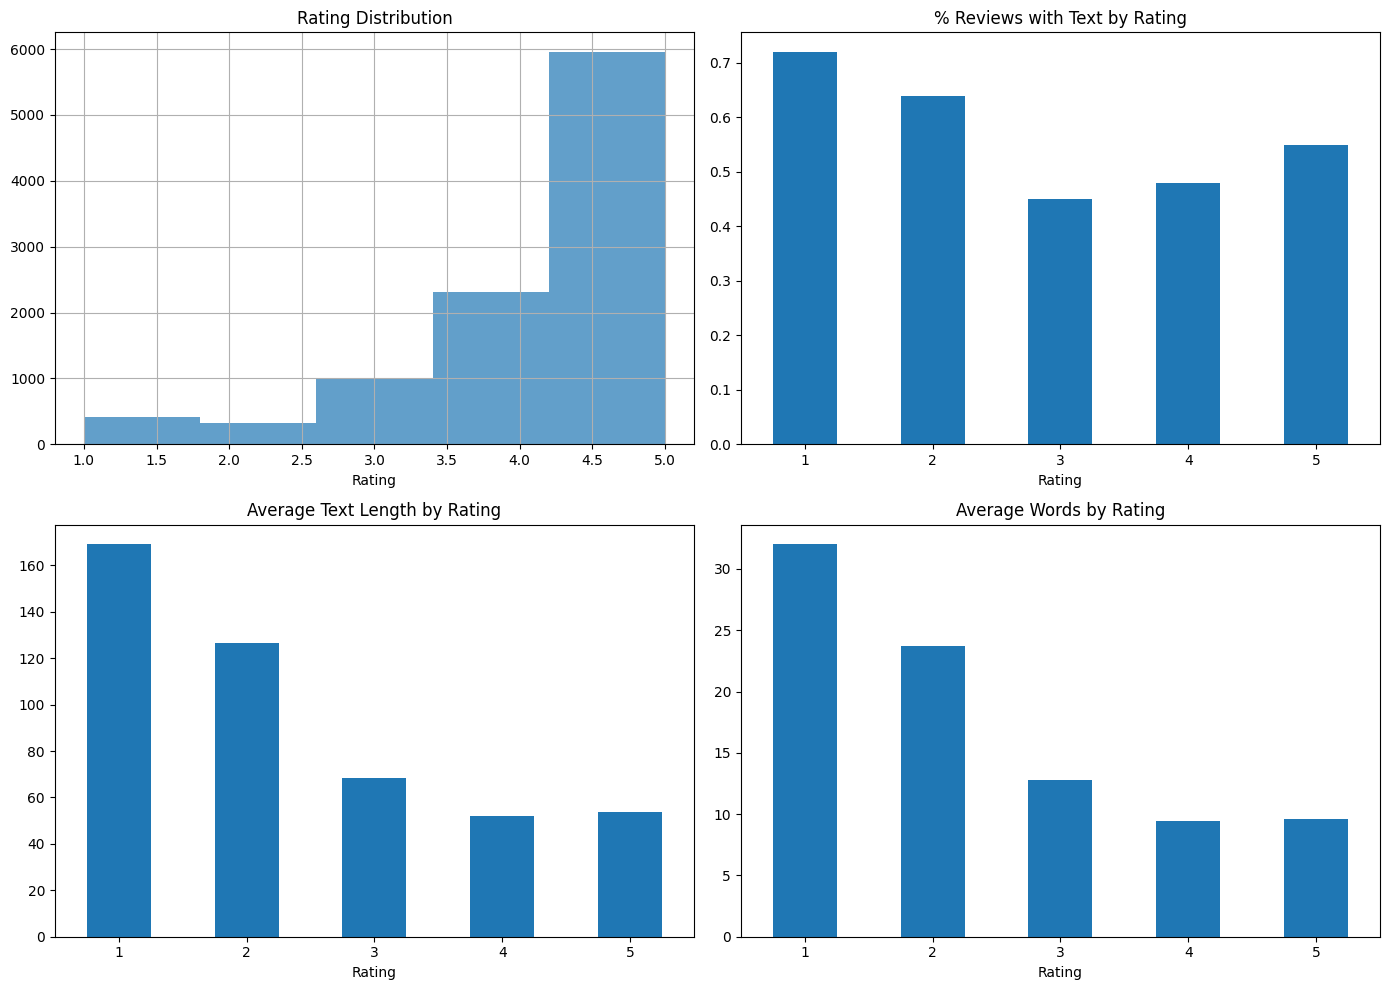

In [9]:
def rating_quality_analysis(df):
    """Analyze relationship between ratings and review quality"""
    print("\n" + "="*60)
    print("RATING vs REVIEW QUALITY ANALYSIS")
    print("="*60)
    
    # Review quality metrics
    df['has_text'] = df['text'].notna()
    df['text_length'] = df['text'].fillna('').str.len()
    df['word_count'] = df['text'].fillna('').str.split().str.len()
    
    # Analysis by rating
    quality_by_rating = df.groupby('rating').agg({
        'has_text': 'mean',
        'text_length': 'mean', 
        'word_count': 'mean',
        'user_id': 'count'
    }).round(2)
    
    print("Review Quality by Rating:")
    print(quality_by_rating.rename(columns={'user_id': 'review_count'}))
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Rating distribution
    df['rating'].hist(bins=5, alpha=0.7, ax=axes[0,0])
    axes[0,0].set_title('Rating Distribution')
    axes[0,0].set_xlabel('Rating')
    
    # Text presence by rating
    quality_by_rating['has_text'].plot(kind='bar', ax=axes[0,1], rot=0)
    axes[0,1].set_title('% Reviews with Text by Rating')
    axes[0,1].set_xlabel('Rating')
    
    # Text length by rating
    quality_by_rating['text_length'].plot(kind='bar', ax=axes[1,0], rot=0)
    axes[1,0].set_title('Average Text Length by Rating')
    axes[1,0].set_xlabel('Rating')
    
    # Word count by rating
    quality_by_rating['word_count'].plot(kind='bar', ax=axes[1,1], rot=0)
    axes[1,1].set_title('Average Words by Rating')
    axes[1,1].set_xlabel('Rating')
    
    plt.tight_layout()
    plt.show()

rating_quality_analysis(sample_df)

In [10]:
def business_response_analysis(df):
    """Analyze business responses to reviews"""
    print("\n" + "="*60)
    print("BUSINESS RESPONSE ANALYSIS")
    print("="*60)
    
    responses = df['resp.text'].dropna()
    print(f"Reviews with business responses: {len(responses):,} ({len(responses)/len(df)*100:.1f}%)")
    
    if len(responses) > 0:
        response_lengths = responses.str.len()
        print(f"Average response length: {response_lengths.mean():.1f} characters")
        
        print(f"\nSample business responses:")
        for i, response in enumerate(responses.head(5)):
            print(f"{i+1}. {response[:150]}{'...' if len(response) > 150 else ''}")

business_response_analysis(sample_df)


BUSINESS RESPONSE ANALYSIS
Reviews with business responses: 765 (7.6%)
Average response length: 143.5 characters

Sample business responses:
1. Sara  Only 3 stars? We would like to get more details about your experience and learn how we can earn those last 2 stars from you. Please click this l...
2. Hi Samuel. We thank you for sharing your experience with us. Customer Satisfaction is our top priority here at Freeway Insurance Services. Thank you f...
3. Hello Patrick,

Thank you for choosing Audi Fletcher Jones. Your feedback is greatly appreciated. Our team of associates are excited to hear that you ...
4. We would like to have a better understanding about your experience. Please reach out to us at your earliest convenience at 619-264-3461 and we will do...
5. Thanks for the great review! 👍


# Metadata

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and inspect structure
with open('meta-California.json', 'r') as f:
    # Check if it's line-delimited JSON or regular JSON
    first_line = f.readline()
    print("First line:", first_line[:200])
    
# Load the data
meta_data = []
with open('meta-California.json', 'r') as f:
    for line in f:
        meta_data.append(json.loads(line))

print(f"Number of records: {len(meta_data)}")
print("Sample record:", meta_data[0])
print("Keys:", meta_data[0].keys())

First line: {"name": "City Textile", "address": "City Textile, 3001 E Pico Blvd, Los Angeles, CA 90023", "gmap_id": "0x80c2c98c0e3c16fd:0x29ec8a728764fdf9", "description": null, "latitude": 34.0188913, "longitude
Number of records: 515961
Sample record: {'name': 'City Textile', 'address': 'City Textile, 3001 E Pico Blvd, Los Angeles, CA 90023', 'gmap_id': '0x80c2c98c0e3c16fd:0x29ec8a728764fdf9', 'description': None, 'latitude': 34.0188913, 'longitude': -118.2152898, 'category': ['Textile exporter'], 'avg_rating': 4.5, 'num_of_reviews': 6, 'price': None, 'hours': None, 'MISC': None, 'state': 'Open now', 'relative_results': ['0x80c2c624136ea88b:0xb0315367ed448771', '0x80c2c97cb7c52f17:0xb66ee68c1c366f2d'], 'url': 'https://www.google.com/maps/place//data=!4m2!3m1!1s0x80c2c98c0e3c16fd:0x29ec8a728764fdf9?authuser=-1&hl=en&gl=us'}
Keys: dict_keys(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude', 'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC', 'state

In [6]:
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

def load_json_data(filepath):
    """Load line-delimited JSON data"""
    data = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError:
                continue
    return data

# Load the data
meta_data = load_json_data('meta-California.json')
df = pd.json_normalize(meta_data)
print(f"Successfully loaded {len(df):,} records")

Successfully loaded 515,961 records


In [7]:
def basic_data_overview(df):
    """Print basic data overview"""
    print("="*60)
    print("BASIC DATA OVERVIEW")
    print("="*60)
    print(f"Dataset shape: {df.shape}")
    print(f"Total records: {len(df):,}")
    print(f"Total columns: {len(df.columns)}")
    print("\nColumn names:")
    for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col}")
    
    print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

basic_data_overview(df)

BASIC DATA OVERVIEW
Dataset shape: (515961, 33)
Total records: 515,961
Total columns: 33

Column names:
 1. name
 2. address
 3. gmap_id
 4. description
 5. latitude
 6. longitude
 7. category
 8. avg_rating
 9. num_of_reviews
10. price
11. hours
12. MISC
13. state
14. relative_results
15. url
16. MISC.Service options
17. MISC.Accessibility
18. MISC.Offerings
19. MISC.Amenities
20. MISC.Atmosphere
21. MISC.Payments
22. MISC.Health & safety
23. MISC.Popular for
24. MISC.Dining options
25. MISC.Crowd
26. MISC.Planning
27. MISC.From the business
28. MISC.Recycling
29. MISC.Highlights
30. MISC.Getting here
31. MISC.Activities
32. MISC.Health and safety
33. MISC.Lodging options

Memory usage: 876.32 MB



MISSING VALUES ANALYSIS
                        Missing_Count  Missing_Percentage
MISC                           515961          100.000000
MISC.Lodging options           515959           99.999612
MISC.Activities                515850           99.978487
MISC.Getting here              515771           99.963176
MISC.Recycling                 515746           99.958330
MISC.Health and safety         514528           99.722266
MISC.From the business         500440           96.991827
MISC.Highlights                441024           85.476228
MISC.Dining options            440842           85.440954
MISC.Crowd                     438541           84.994990
MISC.Popular for               437521           84.797301
MISC.Atmosphere                430242           83.386535
MISC.Health & safety           407697           79.017019
price                          406160           78.719128
description                    404040           78.308244
MISC.Offerings                 387790          

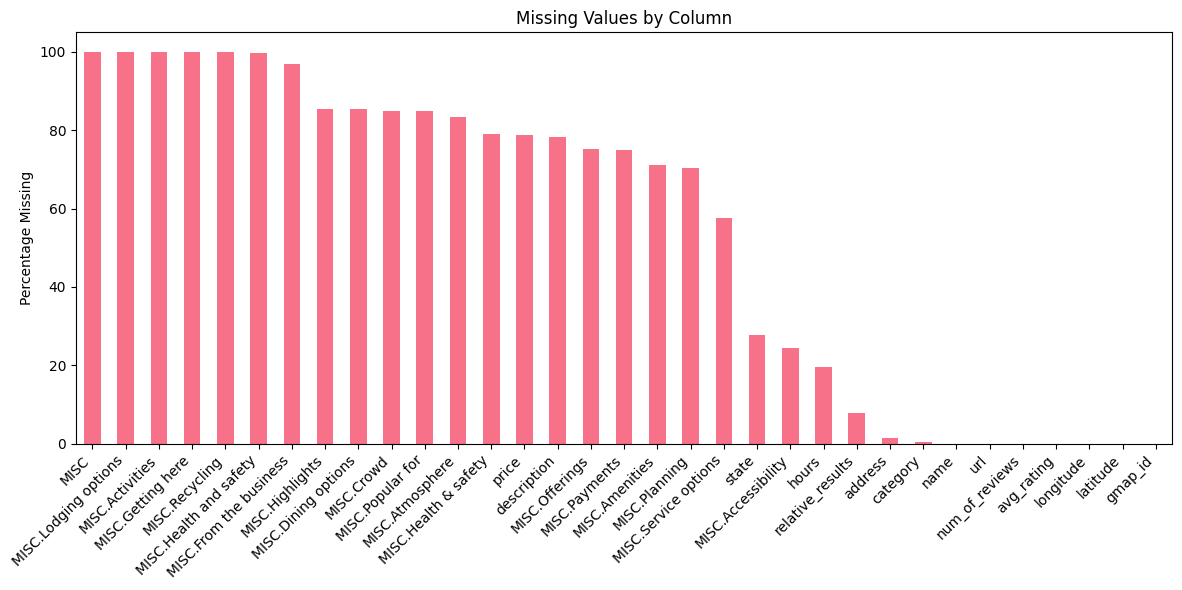

In [8]:
def missing_values_analysis(df):
    """Analyze missing values"""
    print("\n" + "="*60)
    print("MISSING VALUES ANALYSIS")
    print("="*60)
    
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Missing_Count': missing,
        'Missing_Percentage': missing_pct
    }).sort_values('Missing_Percentage', ascending=False)
    
    print(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    missing_df['Missing_Percentage'].plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

missing_values_analysis(df)


CATEGORICAL DATA ANALYSIS

--- BUSINESS CATEGORIES ---
Total unique categories: 4019
Total category instances: 1,180,076

Top 15 most common categories:
Restaurant                    : 38,523 (3.26%)
Fast food restaurant          : 15,560 (1.32%)
Mexican restaurant            : 13,969 (1.18%)
Auto repair shop              : 13,163 (1.12%)
Beauty salon                  : 10,758 (0.91%)
Coffee shop                   : 10,487 (0.89%)
Tourist attraction            : 10,208 (0.87%)
Grocery store                 : 10,070 (0.85%)
Breakfast restaurant          :  9,815 (0.83%)
Cafe                          :  9,780 (0.83%)
Park                          :  9,636 (0.82%)
American restaurant           :  9,509 (0.81%)
Gas station                   :  9,314 (0.79%)
Takeout Restaurant            :  9,026 (0.76%)
Clothing store                :  8,794 (0.75%)


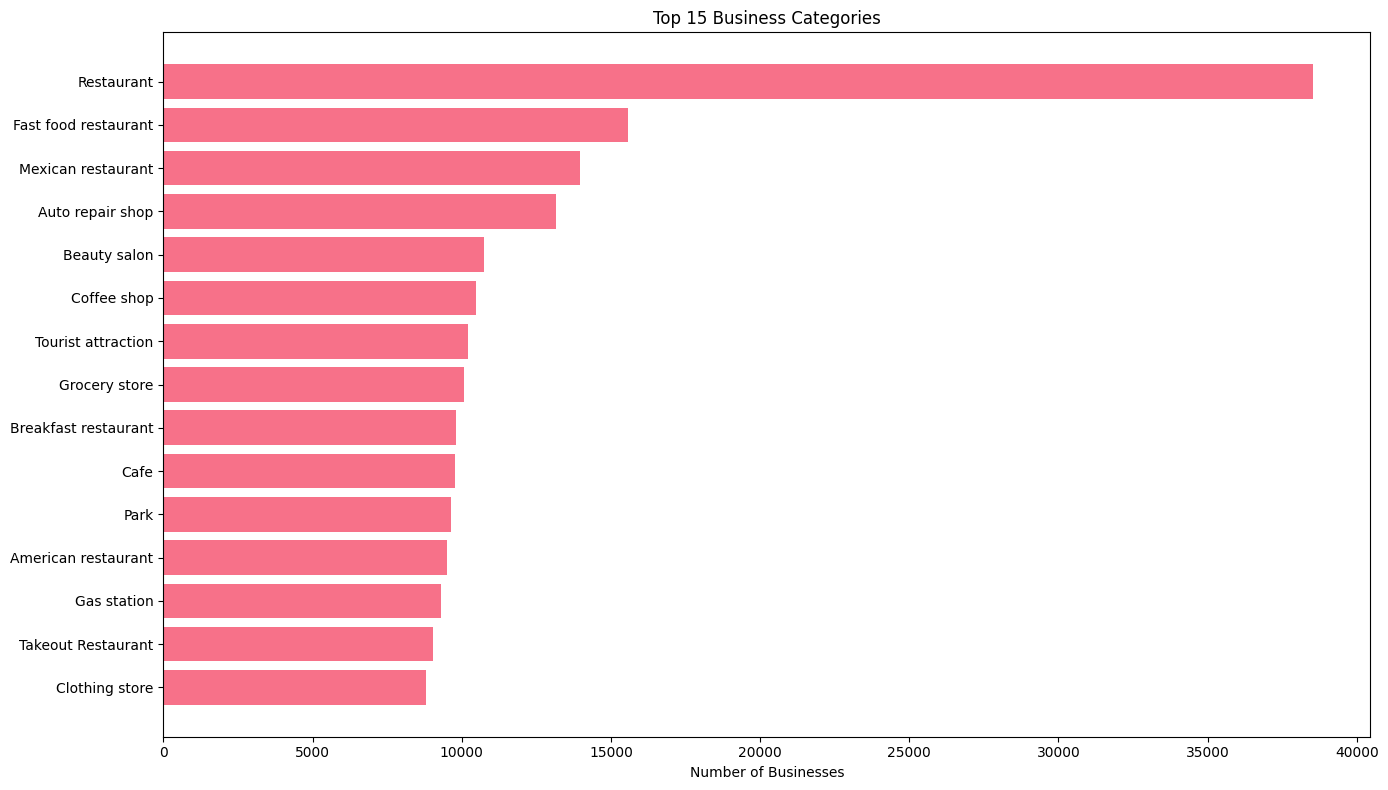


--- BUSINESS STATE ---
state_clean
Temporarily closed    199980
Unknown               143713
Other                 111778
Permanently closed     33500
Open 24 hours          22396
Open now                4594
Name: count, dtype: int64


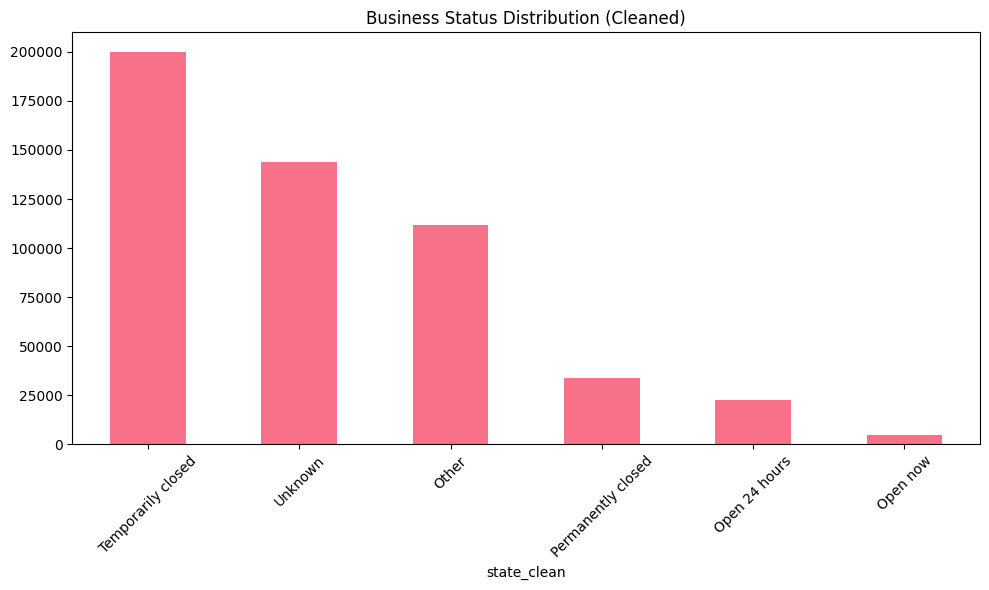

In [9]:
def categorical_analysis(df):
    """Analyze categorical columns"""
    print("\n" + "="*60)
    print("CATEGORICAL DATA ANALYSIS")
    print("="*60)
    
    # Business categories analysis
    if 'category' in df.columns:
        print("\n--- BUSINESS CATEGORIES ---")
        
        # Flatten categories (since they're in lists)
        all_categories = []
        for cats in df['category'].dropna():
            if isinstance(cats, list):
                all_categories.extend(cats)
            elif isinstance(cats, str):
                all_categories.append(cats)
        
        category_counts = Counter(all_categories)
        print(f"Total unique categories: {len(category_counts)}")
        print(f"Total category instances: {len(all_categories):,}")
        
        print("\nTop 15 most common categories:")
        for cat, count in category_counts.most_common(15):
            percentage = (count / len(all_categories)) * 100
            print(f"{cat:<30}: {count:6,} ({percentage:.2f}%)")
        
        # Plot top categories
        top_categories = dict(category_counts.most_common(15))
        plt.figure(figsize=(14, 8))
        plt.barh(list(top_categories.keys())[::-1], list(top_categories.values())[::-1])
        plt.title('Top 15 Business Categories')
        plt.xlabel('Number of Businesses')
        plt.tight_layout()
        plt.show()
    
    # State analysis - Clean the state field first
    if 'state' in df.columns:
        print("\n--- BUSINESS STATE ---")
        
        # Clean state values
        def clean_state(state_val):
            if pd.isna(state_val):
                return 'Unknown'
            state_str = str(state_val).strip()
            if 'permanently closed' in state_str.lower():
                return 'Permanently closed'
            elif 'open now' in state_str.lower():
                return 'Open now'
            elif 'closed' in state_str.lower() and 'opens' in state_str.lower():
                return 'Temporarily closed'
            elif 'open 24 hours' in state_str.lower():
                return 'Open 24 hours'
            else:
                return 'Other'
        
        df['state_clean'] = df['state'].apply(clean_state)
        state_counts = df['state_clean'].value_counts()
        print(state_counts)
        
        plt.figure(figsize=(10, 6))
        state_counts.plot(kind='bar')
        plt.title('Business Status Distribution (Cleaned)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

categorical_analysis(df)


NUMERICAL DATA ANALYSIS

Numerical columns found: ['avg_rating', 'num_of_reviews', 'latitude', 'longitude']

Descriptive statistics:
          avg_rating  num_of_reviews       latitude      longitude
count  515961.000000   515961.000000  515961.000000  515961.000000
mean        4.278333      136.696334      35.538558    -119.412233
std         0.627410      375.423986       2.137430       3.410867
min         1.000000        1.000000      21.881041    -140.173392
25%         4.000000        8.000000      33.897430    -121.574379
50%         4.400000       33.000000      34.218867    -118.448297
75%         4.700000      108.000000      37.680093    -117.868463
max         5.000000     9998.000000      44.393000     180.000000

--- RATING ANALYSIS ---
Businesses with ratings: 515,961 (100.0%)
Average rating: 4.28
Rating range: 1.0 - 5.0


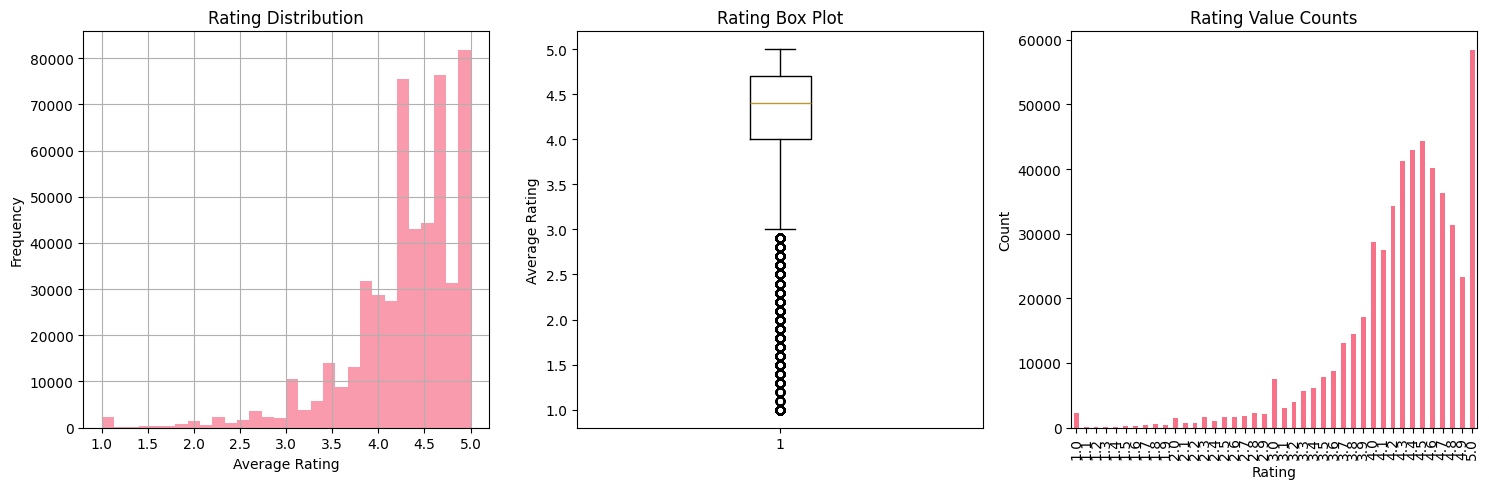


--- REVIEW COUNT ANALYSIS ---
Businesses with review counts: 515,961
Average reviews per business: 136.7
Median reviews per business: 33.0
Max reviews: 9,998


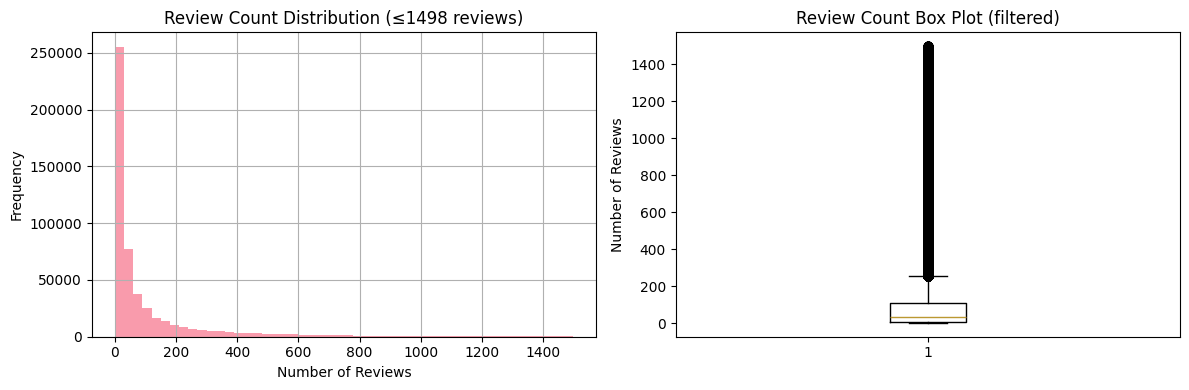

In [10]:
def numerical_analysis(df):
    """Analyze numerical columns"""
    print("\n" + "="*60)
    print("NUMERICAL DATA ANALYSIS")
    print("="*60)
    
    numerical_cols = ['avg_rating', 'num_of_reviews', 'latitude', 'longitude']
    existing_cols = [col for col in numerical_cols if col in df.columns]
    
    print(f"\nNumerical columns found: {existing_cols}")
    
    if existing_cols:
        print("\nDescriptive statistics:")
        print(df[existing_cols].describe())
        
        # Rating analysis
        if 'avg_rating' in df.columns:
            print("\n--- RATING ANALYSIS ---")
            rating_clean = df['avg_rating'].dropna()
            print(f"Businesses with ratings: {len(rating_clean):,} ({len(rating_clean)/len(df)*100:.1f}%)")
            print(f"Average rating: {rating_clean.mean():.2f}")
            print(f"Rating range: {rating_clean.min():.1f} - {rating_clean.max():.1f}")
            
            plt.figure(figsize=(15, 5))
            
            plt.subplot(1, 3, 1)
            rating_clean.hist(bins=30, alpha=0.7)
            plt.title('Rating Distribution')
            plt.xlabel('Average Rating')
            plt.ylabel('Frequency')
            
            plt.subplot(1, 3, 2)
            plt.boxplot(rating_clean)
            plt.title('Rating Box Plot')
            plt.ylabel('Average Rating')
            
            plt.subplot(1, 3, 3)
            rating_counts = rating_clean.value_counts().sort_index()
            rating_counts.plot(kind='bar')
            plt.title('Rating Value Counts')
            plt.xlabel('Rating')
            plt.ylabel('Count')
            
            plt.tight_layout()
            plt.show()
        
        # Review count analysis
        if 'num_of_reviews' in df.columns:
            print("\n--- REVIEW COUNT ANALYSIS ---")
            review_clean = df['num_of_reviews'].dropna()
            print(f"Businesses with review counts: {len(review_clean):,}")
            print(f"Average reviews per business: {review_clean.mean():.1f}")
            print(f"Median reviews per business: {review_clean.median():.1f}")
            print(f"Max reviews: {review_clean.max():,}")
            
            # Remove outliers for better visualization
            q99 = review_clean.quantile(0.99)
            review_filtered = review_clean[review_clean <= q99]
            
            plt.figure(figsize=(12, 4))
            
            plt.subplot(1, 2, 1)
            review_filtered.hist(bins=50, alpha=0.7)
            plt.title(f'Review Count Distribution (≤{q99:.0f} reviews)')
            plt.xlabel('Number of Reviews')
            plt.ylabel('Frequency')
            
            plt.subplot(1, 2, 2)
            plt.boxplot(review_filtered)
            plt.title('Review Count Box Plot (filtered)')
            plt.ylabel('Number of Reviews')
            
            plt.tight_layout()
            plt.show()

numerical_analysis(df)

## Summary

Rating Analysis:

- Average rating: 4.28 
- Distribution: Heavily skewed toward 4.0-5.0 ratings
- Range: 1.0-5.0 (valid range)
- Most common: 5.0 and 4.5 ratings

Review Count Analysis:

- Median: 33 reviews per business
- Max: 9,998 reviews
- Distribution: Right-skewed (many businesses have few reviews, few have many)


GEOGRAPHIC ANALYSIS
Businesses with coordinates: 515,961
Latitude range: 21.8810 to 44.3930
Longitude range: -140.1734 to 180.0000


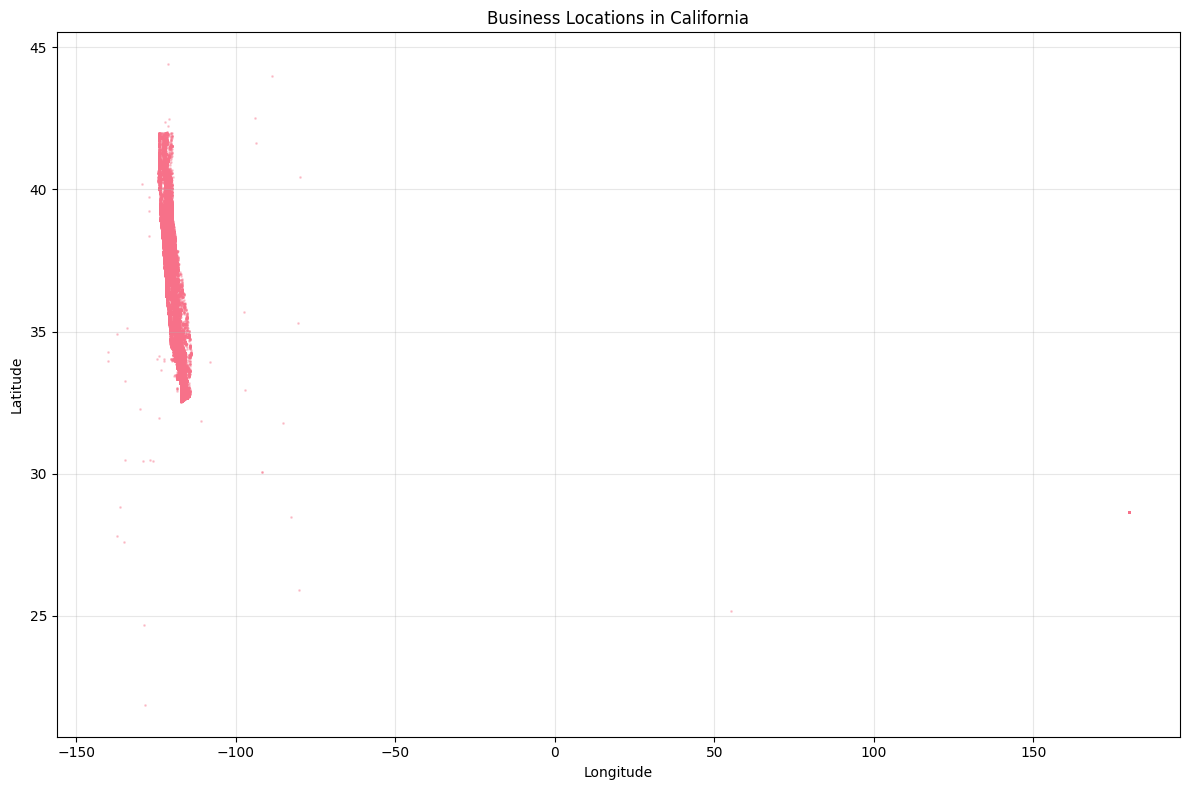

In [11]:
def geographic_analysis(df):
    """Analyze geographic distribution"""
    print("\n" + "="*60)
    print("GEOGRAPHIC ANALYSIS")
    print("="*60)
    
    if 'latitude' in df.columns and 'longitude' in df.columns:
        lat_clean = df['latitude'].dropna()
        lng_clean = df['longitude'].dropna()
        
        print(f"Businesses with coordinates: {len(lat_clean):,}")
        print(f"Latitude range: {lat_clean.min():.4f} to {lat_clean.max():.4f}")
        print(f"Longitude range: {lng_clean.min():.4f} to {lng_clean.max():.4f}")
        
        # Create geographic scatter plot
        plt.figure(figsize=(12, 8))
        plt.scatter(df['longitude'], df['latitude'], alpha=0.3, s=1)
        plt.title('Business Locations in California')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

geographic_analysis(df)

In [12]:
def data_quality_checks(df):
    """Perform data quality checks"""
    print("\n" + "="*60)
    print("DATA QUALITY CHECKS")
    print("="*60)
    
    # Check for duplicates (excluding list columns)
    cols_to_check = [col for col in df.columns if not df[col].apply(lambda x: isinstance(x, list)).any()]
    duplicates = df[cols_to_check].duplicated()
    print(f"Duplicate rows (excluding list columns): {duplicates.sum():,} ({duplicates.sum()/len(df)*100:.2f}%)")
    
    # Check for duplicate gmap_ids
    if 'gmap_id' in df.columns:
        duplicate_ids = df['gmap_id'].duplicated()
        print(f"Duplicate gmap_ids: {duplicate_ids.sum():,}")
        if duplicate_ids.sum() > 0:
            print("Sample duplicate gmap_ids:")
            print(df[duplicate_ids]['gmap_id'].head())
    
    # Check for invalid ratings
    if 'avg_rating' in df.columns:
        invalid_ratings = df[(df['avg_rating'] < 1) | (df['avg_rating'] > 5)]['avg_rating'].dropna()
        print(f"Invalid ratings (outside 1-5): {len(invalid_ratings)}")
        if len(invalid_ratings) > 0:
            print("Invalid rating values:", invalid_ratings.unique())
    
    # Check for negative review counts
    if 'num_of_reviews' in df.columns:
        negative_reviews = df[df['num_of_reviews'] < 0]['num_of_reviews'].dropna()
        print(f"Negative review counts: {len(negative_reviews)}")
    
    # Check coordinate validity (California bounds approximately)
    if 'latitude' in df.columns and 'longitude' in df.columns:
        # California bounds: lat 32.5-42, lng -124 to -114
        invalid_coords = df[
            (df['latitude'] < 32) | (df['latitude'] > 42) |
            (df['longitude'] < -125) | (df['longitude'] > -114)
        ]
        print(f"Invalid coordinates (outside California): {len(invalid_coords)}")

data_quality_checks(df)


DATA QUALITY CHECKS
Duplicate rows (excluding list columns): 2,827 (0.55%)
Duplicate gmap_ids: 2,827
Sample duplicate gmap_ids:
2827    0x80c2c98c0e3c16fd:0x29ec8a728764fdf9
2828    0x80c2c778e3b73d33:0xbdc58662a4a97d49
2829     0x80c2c89923b27a41:0x32041559418d447
2830    0x80c2c632f933b073:0xc31785961fe826a6
2831    0x80c2cf163db6bc89:0x219484e2edbcfa41
Name: gmap_id, dtype: object
Invalid ratings (outside 1-5): 0
Negative review counts: 0
Invalid coordinates (outside California): 83


In [18]:
def investigate_duplicates(df):
    """Check if duplicate gmap_ids actually have different data"""
    
    # Find all duplicate gmap_ids
    duplicate_ids = df[df['gmap_id'].duplicated(keep=False)]['gmap_id'].unique()
    print(f"Found {len(duplicate_ids)} businesses with duplicate gmap_ids")
    
    # Examine a few examples
    for i, gmap_id in enumerate(duplicate_ids[:5]):  # Check first 5
        print(f"\n--- Example {i+1}: {gmap_id} ---")
        duplicates = df[df['gmap_id'] == gmap_id]
        print(f"Number of records: {len(duplicates)}")
        
        # Check if key fields are different
        cols_to_check = ['name', 'avg_rating', 'num_of_reviews', 'category', 'state']
        for col in cols_to_check:
            if col in df.columns:
                unique_vals = duplicates[col].astype(str).unique()
                print(f"{col}: {len(unique_vals)} unique values")
                if len(unique_vals) <= 3:  # Show values if not too many
                    print(f"  Values: {list(unique_vals)}")
        
        # Show the actual duplicate rows
        print("\nActual rows:")
        display_cols = ['name', 'avg_rating', 'num_of_reviews', 'state']
        available_cols = [col for col in display_cols if col in df.columns]
        print(duplicates[available_cols].to_string())
    
    # Overall duplicate analysis
    print(f"\n--- DUPLICATE ANALYSIS SUMMARY ---")
    duplicate_rows = df[df['gmap_id'].duplicated(keep=False)]
    
    # Group by gmap_id and check variations
    duplicate_groups = duplicate_rows.groupby('gmap_id')
    
    # Check how many have different ratings
    rating_diffs = 0
    review_diffs = 0
    name_diffs = 0
    
    for gmap_id, group in duplicate_groups:
        if len(group['avg_rating'].unique()) > 1:
            rating_diffs += 1
        if len(group['num_of_reviews'].unique()) > 1:
            review_diffs += 1
        if len(group['name'].astype(str).unique()) > 1:
            name_diffs += 1
    
    print(f"Businesses with different avg_rating: {rating_diffs}")
    print(f"Businesses with different num_of_reviews: {review_diffs}")  
    print(f"Businesses with different names: {name_diffs}")
    print(f"Total duplicate groups: {len(duplicate_groups)}")

# Run this investigation
investigate_duplicates(df)

Found 2827 businesses with duplicate gmap_ids

--- Example 1: 0x80c2c98c0e3c16fd:0x29ec8a728764fdf9 ---
Number of records: 2
name: 1 unique values
  Values: ['City Textile']
avg_rating: 1 unique values
  Values: ['4.5']
num_of_reviews: 1 unique values
  Values: ['6']
category: 1 unique values
  Values: ["['Textile exporter']"]
state: 1 unique values
  Values: ['Open now']

Actual rows:
              name  avg_rating  num_of_reviews     state
0     City Textile         4.5               6  Open now
2827  City Textile         4.5               6  Open now

--- Example 2: 0x80c2c778e3b73d33:0xbdc58662a4a97d49 ---
Number of records: 2
name: 1 unique values
  Values: ['San Soo Dang']
avg_rating: 1 unique values
  Values: ['4.4']
num_of_reviews: 1 unique values
  Values: ['18']
category: 1 unique values
  Values: ["['Korean restaurant']"]
state: 1 unique values
  Values: ['Open ⋅ Closes 6PM']

Actual rows:
              name  avg_rating  num_of_reviews              state
1     San Soo Dang  

## Summary

Duplicate Businesses (2,827 duplicates = 0.55%)

83 businesses have coordinates outside California


CORRELATION ANALYSIS

Correlation matrix:
                avg_rating  num_of_reviews  latitude  longitude
avg_rating        1.000000        0.010777 -0.003505  -0.000016
num_of_reviews    0.010777        1.000000 -0.022923   0.012168
latitude         -0.003505       -0.022923  1.000000  -0.569113
longitude        -0.000016        0.012168 -0.569113   1.000000


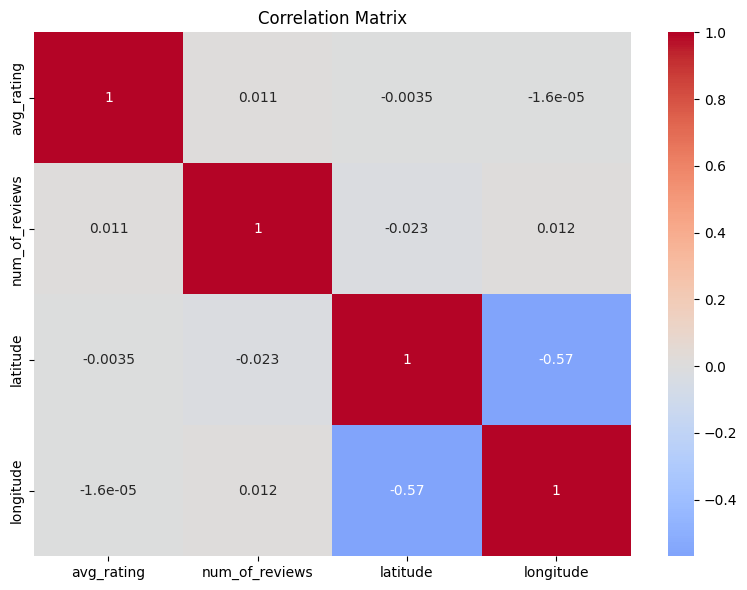

In [14]:
def correlation_analysis(df):
    """Analyze correlations between numerical variables"""
    print("\n" + "="*60)
    print("CORRELATION ANALYSIS")
    print("="*60)
    
    numerical_cols = ['avg_rating', 'num_of_reviews', 'latitude', 'longitude']
    existing_cols = [col for col in numerical_cols if col in df.columns]
    
    if len(existing_cols) > 1:
        corr_matrix = df[existing_cols].corr()
        print("\nCorrelation matrix:")
        print(corr_matrix)
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Matrix')
        plt.tight_layout()
        plt.show()

correlation_analysis(df)

## Summary

Very weak correlations (all values close to 0)

Rating vs Review Count (0.011):
- Almost no relationship between average rating and number of reviews
- Businesses with many reviews aren't necessarily higher/lower rated
- This suggests ratings are relatively unbiased by popularity

Geographic Correlations (-0.57 between lat/lng):
- California's geographic shape
- As you go north (higher latitude), you go slightly east (less negative longitude)

Location vs Business Metrics (~0):
- Geographic location doesn't correlate with ratings or review counts
- Quality businesses are distributed throughout California
- No clear "good business" geographic clusters